In [2]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/breast_cancer_survival (1).csv')
d=d.dropna()
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [3]:
d['Gender']=d['Gender'].replace({'MALE':1,'FEMALE':0})
d['ER status']=d['ER status'].replace({'Positive':1,'Negative':0})
d['PR status']=d['PR status'].replace({'Positive':1,'Negative':0})
d['HER2 status']=d['HER2 status'].replace({'Positive':1,'Negative':0})
d['Tumour_Stage']=d['Tumour_Stage'].replace({'I':1,'II':2,'III':3,'IV':4})
d['Histology']=d['Histology'].replace({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':0,'Mucinous Carcinoma':0.5})
d['Surgery_type']=d['Surgery_type'].replace({'Simple Mastectomy':1,'Lumpectomy':0,'Modified Radical Mastectomy':2,'Other':3})
d['Patient_Status']=d['Patient_Status'].replace({'Alive':1,'Dead':0})
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0          1.0          1          1        

<ipython-input-3-42d96e880168>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Gender']=d['Gender'].replace({'MALE':1,'FEMALE':0})
<ipython-input-3-42d96e880168>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['ER status']=d['ER status'].replace({'Positive':1,'Negative':0})
<ipython-input-3-42d96e880168>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, se

In [4]:
d.dtypes

,0
Age,int64
Gender,int64
Protein1,float64
Protein2,float64
Protein3,float64
Protein4,float64
Tumour_Stage,int64
Histology,float64
ER status,int64
PR status,int64


In [5]:
y=d['Patient_Status']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 317, dtype: int64


In [6]:
x=d.drop(['Patient_Status','Date_of_Last_Visit','Date_of_Surgery'],axis=1)
x.dropna()
print(x)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  
0          1.0          1          1         

In [7]:
from sklearn.linear_model import LogisticRegression
model_Logistic = LogisticRegression(max_iter=1000)
model_Logistic.fit(x, y)

LogisticRegression(max_iter=1000)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
test_sizes = [0.2, 0.25, 0.3]
for test_size in test_sizes:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
  model = LogisticRegression(max_iter=1000)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with test size {test_size}: {accuracy}")



Accuracy with test size 0.2: 0.796875
Accuracy with test size 0.25: 0.7875
Accuracy with test size 0.3: 0.7916666666666666


In [9]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [10]:
from sklearn.svm import SVC
model1 = SVC()
test_sizes = [0.2, 0.25, 0.3]
for test_size in test_sizes:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
  model1 = LogisticRegression(max_iter=1000)
  model1.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with test size {test_size}: {accuracy}")


Accuracy with test size 0.2: 0.796875
Accuracy with test size 0.25: 0.7875
Accuracy with test size 0.3: 0.7916666666666666


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
test_sizes = [0.2, 0.25, 0.3]
for test_size in test_sizes:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
  model_knn.fit(x_train, y_train)
  y_pred_knn = model_knn.predict(x_test)
  accuracy_knn = accuracy_score(y_test, y_pred_knn)
  print(f"KNN Accuracy with test size {test_size}: {accuracy_knn}")

KNN Accuracy with test size 0.2: 0.765625
KNN Accuracy with test size 0.25: 0.7625
KNN Accuracy with test size 0.3: 0.7708333333333334


In [13]:
x_train.shape

(221, 12)

In [14]:
y_train.shape

(221,)

In [15]:
from sklearn.utils import resample

In [16]:
knn_accuracies = []
lr=[]
sv=[]

In [17]:
model_Logistic=LogisticRegression(max_iter=1000)

In [18]:
x.shape

(317, 12)

In [19]:
y.shape

(317,)

In [20]:
for i in range(10):
  x_resample,y_resample=resample(x,y)
  x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample, test_size=0.2,random_state=42)
  model_Logistic.fit(x_train,y_train)
  model_knn.fit(x_train,y_train)
  model_svc.fit(x_train,y_train)
  y_pred_lr=model_Logistic.predict(x_test)
  y_pred_knn=model_knn.predict(x_test)
  y_pred_svc=model_svc.predict(x_test)
  accuracy_knn=accuracy_score(y_test,y_pred_knn)
  accuracy_lr=accuracy_score(y_test,y_pred_lr)
  accuracy_svc=accuracy_score(y_test,y_pred_svc)
  knn_accuracies.append(accuracy_knn)
  lr.append(accuracy_lr)
  sv.append(accuracy_svc)

In [21]:
knn_accuracies

[0.84375,
 0.734375,
 0.765625,
 0.875,
 0.84375,
 0.859375,
 0.859375,
 0.765625,
 0.84375,
 0.6875]

In [22]:
lr

[0.828125,
 0.71875,
 0.75,
 0.890625,
 0.859375,
 0.890625,
 0.875,
 0.765625,
 0.765625,
 0.6875]

In [23]:
sv

[0.828125,
 0.71875,
 0.75,
 0.890625,
 0.859375,
 0.890625,
 0.875,
 0.765625,
 0.765625,
 0.6875]

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
x=np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
print(len(knn_accuracies))

10


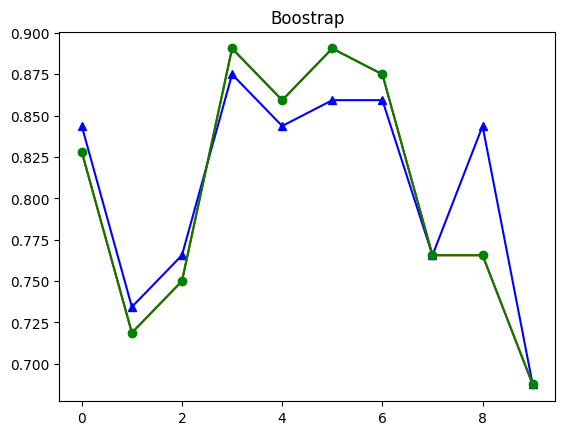

In [27]:
plt.title('Boostrap')
plt.plot(x,knn_accuracies,marker='^',label='knn',color='blue')
plt.plot(x,sv,marker='*',label='sv',color='red')
plt.plot(x,lr,marker='o',label='lr',color='green')
plt.show()

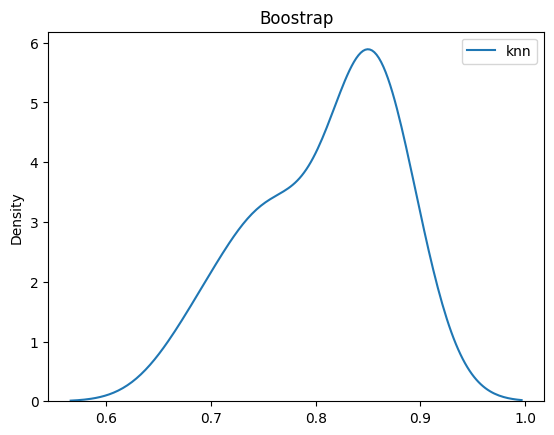

In [28]:
plt.title('Boostrap')
sns.kdeplot(knn_accuracies,label='knn')
# sns.kdeplot(lr,label='lr')
# sns.kdeplot(sv,label='sv')
plt.legend()

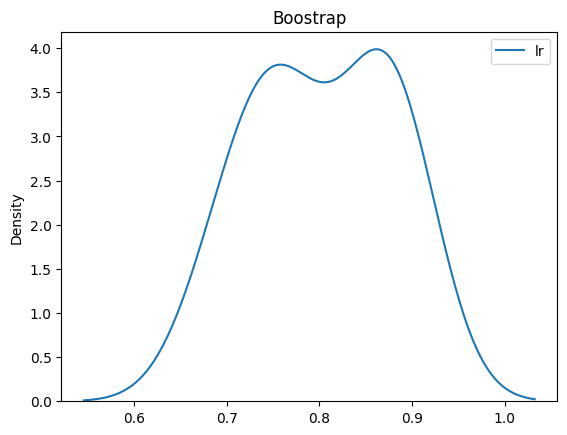

In [29]:
plt.title('Boostrap')
sns.kdeplot(lr,label='lr')
plt.legend()

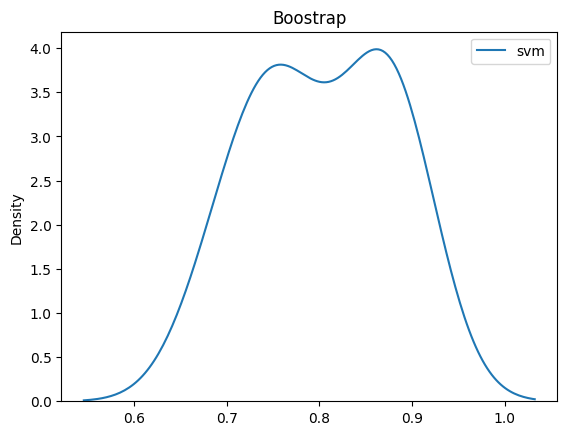

In [30]:
plt.title('Boostrap')
sns.kdeplot(sv,label='svm')
plt.legend()